In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Salary_Data
df = pd.read_csv('Salary_Data.csv')

In [3]:
df

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


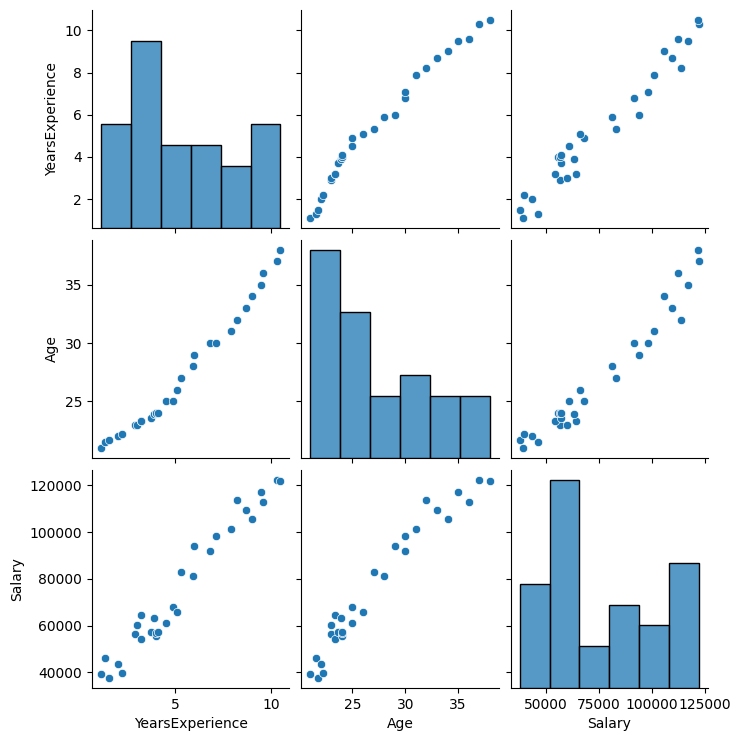

In [4]:
sns.pairplot(data=df)
plt.show()

In [5]:
df.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

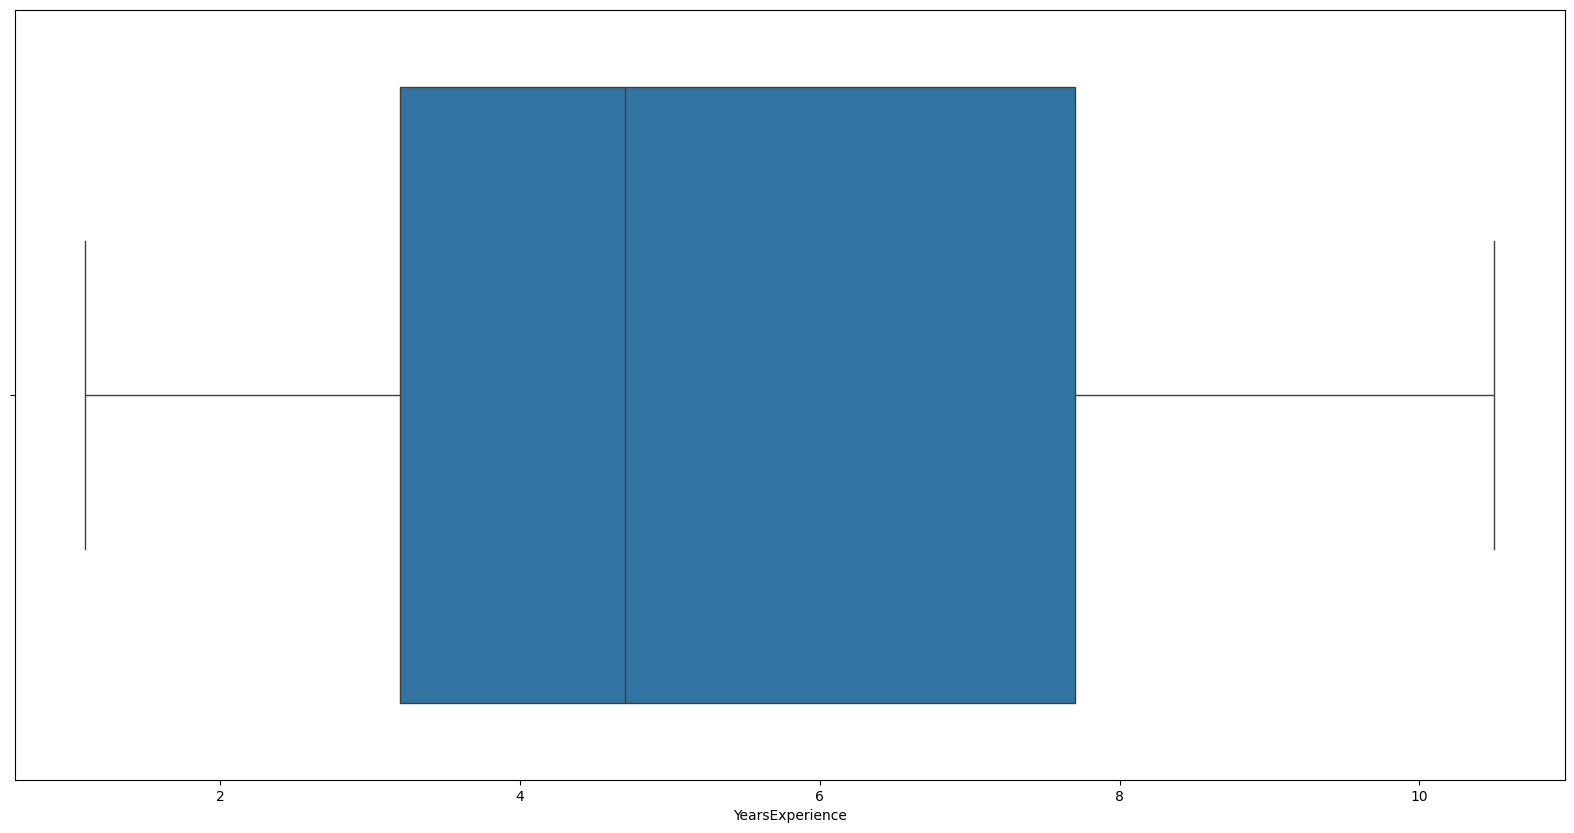

In [6]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = "YearsExperience",data=df)
plt.show()

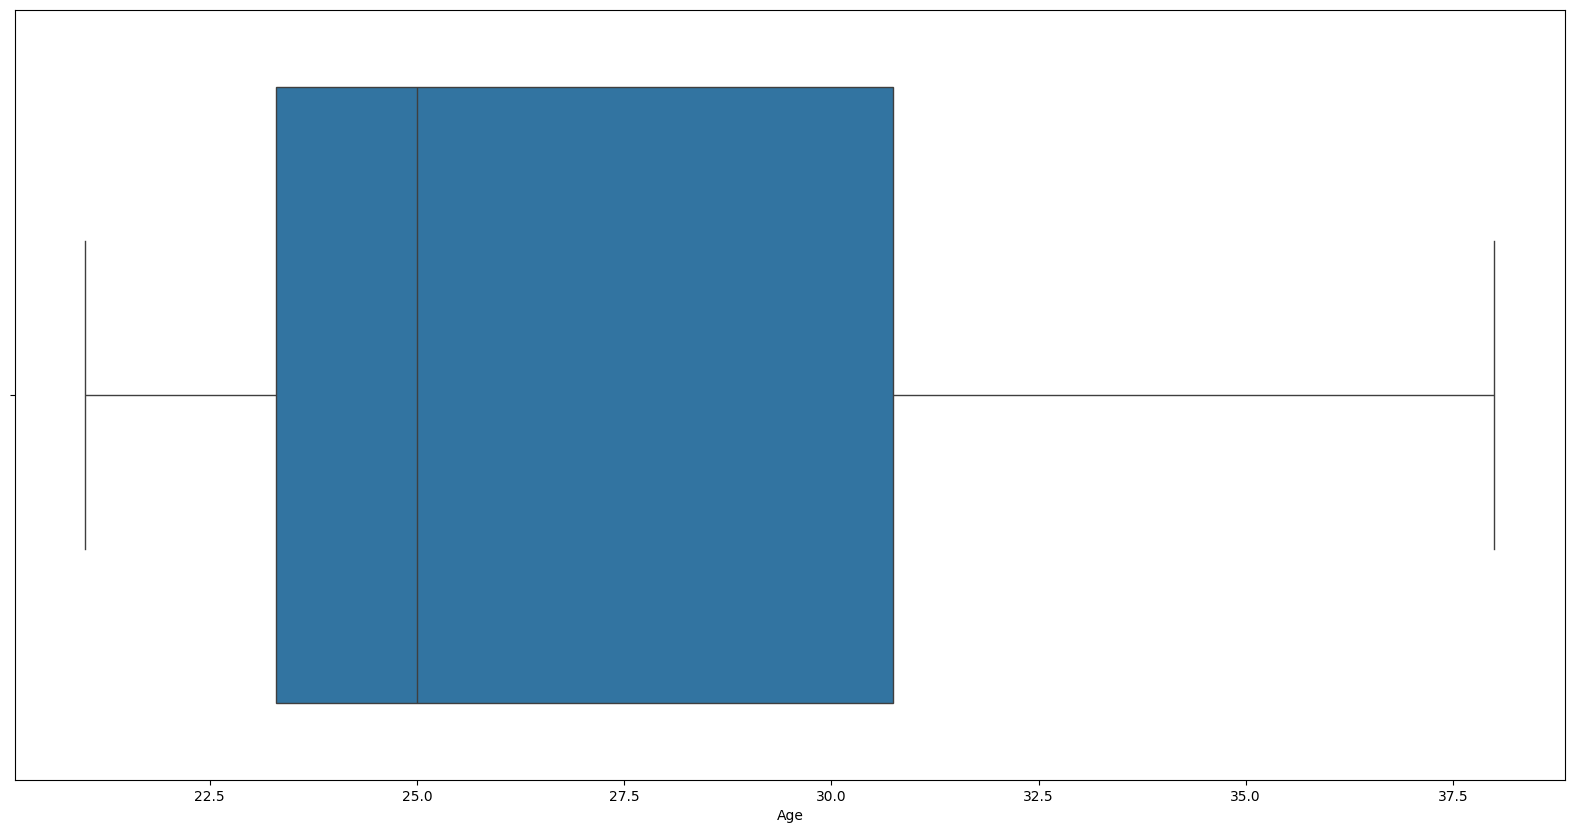

In [7]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = "Age",data=df)
plt.show()

In [8]:
x= df.iloc[:,:-1]

In [9]:
y =df["Salary"]

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc =StandardScaler()

In [12]:
# sc.fit(x)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
sc =StandardScaler()

In [16]:
sc.fit(x_train)

StandardScaler()

In [17]:
y_test

27    112635
15     67938
23    113812
17     83088
8      64445
9      57189
Name: Salary, dtype: int64

In [18]:
x_test 

,YearsExperience,Age
27,9.6,36.0
15,4.9,25.0
23,8.2,32.0
17,5.3,27.0
8,3.2,23.3
9,3.7,23.6


In [19]:
y_test

27    112635
15     67938
23    113812
17     83088
8      64445
9      57189
Name: Salary, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [21]:
dr = DecisionTreeRegressor(max_depth=5)

In [22]:
dr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [23]:
dr.score(x_test,y_test)*100

82.08891887191724

In [24]:
dr.score(x_train,y_train)*100

99.75013592161555

In [25]:
from sklearn.linear_model import Lasso,Ridge

In [26]:
la = Lasso(alpha=0.5)

In [27]:
la.fit(x_train,y_train)

Lasso(alpha=0.5)

In [28]:
la.score(x_test,y_test)*100

88.52340744779417

In [29]:
la.score(x_train,y_train)*100

97.00017880095616

In [30]:
ri = Ridge(alpha=10)

In [31]:
ri.fit(x_train,y_train)

Ridge(alpha=10)

In [32]:
ri.score(x_test,y_test)*100

87.36446672282734

In [33]:
ri.score(x_train,y_train)*100

96.88926941291608

In [34]:
dr.predict([[9.6,36.0]])  #27    112635

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([116969.])

In [35]:
la.predict([[9.6,36.0]])  #27    112635


D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([118684.32191675])

In [36]:
ri.predict([[9.6,36.0]])  #27    112635

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([119200.85142218])

In [37]:
dr.predict([[4.9,25.0]]) #15     67938

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([61111.])

In [38]:
la.predict([[4.9,25.0]]) #15  

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([67501.32768601])

In [39]:
ri.predict([[4.9,25.0]]) #15  

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([65937.43016756])

In [40]:
# # Save the model pkl 
# import pickle
# with open('salary_model_DTC.pkl', 'wb') as file:
#     pickle.dump(ri, file)

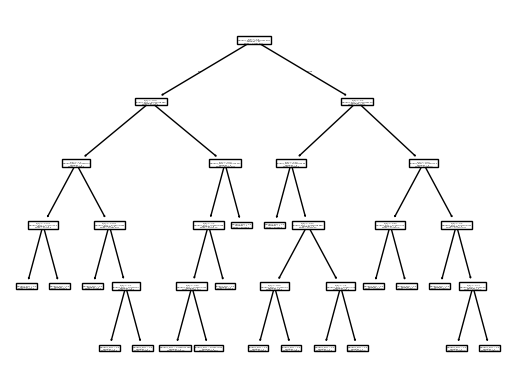

In [41]:
plot_tree(dr)
plt.show()

In [42]:
for i in range(1,20):
    dt2 = DecisionTreeRegressor(max_depth = i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train)*100,dt2.score(x_test,y_test)*100 ,i)

84.55028049302054 51.992349374770065 1
96.59721131368644 63.57966272388554 2
98.99768245852918 74.11603324424563 3
99.63768247414005 81.8845835289307 4
99.75013592161555 82.08891887191724 5
99.90603567096097 81.71010615747151 6
99.96276962076423 78.81574448805704 7
99.99631319936537 78.81574448805704 8
99.99631319936537 78.81574448805704 9
99.99631319936537 78.81574448805704 10
99.99631319936537 80.21759743735161 11
99.99631319936537 78.81574448805704 12
99.99631319936537 78.81574448805704 13
99.99631319936537 80.21759743735161 14
99.99631319936537 80.21759743735161 15
99.99631319936537 80.21759743735161 16
99.99631319936537 80.21759743735161 17
99.99631319936537 78.81574448805704 18
99.99631319936537 78.81574448805704 19


In [45]:
dt_pred = dr.predict([[9.6, 36.0]])  # Expected Salary: 112635
lasso_pred = la.predict([[9.6, 36.0]])  # Expected Salary: 112635
ridge_pred = ri.predict([[9.6, 36.0]]) 

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [46]:
print("Decision Tree Prediction: ", dt_pred)
print("Lasso Prediction: ", lasso_pred)
print("Ridge Prediction: ", ridge_pred)

Decision Tree Prediction:  [116969.]
Lasso Prediction:  [118684.32191675]
Ridge Prediction:  [119200.85142218]


In [47]:
# # Save the Lasso model
# with open('lasso_model.pkl', 'wb') as file:
#     pickle.dump(la, file)

# # Save the Decision Tree model
# with open('decision_tree_model.pkl', 'wb') as file:
#     pickle.dump(dr, file)


In [ ]:
import pickle

# Save the Decision Tree model
with open('salary_model_DTC.pkl', 'wb') as file:
    pickle.dump(dr, file)

# Save the Lasso model
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(la, file)

# Save the Ridge model
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ri, file)
